In [1]:
import pandas as pd #reading csv files
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

#Reading the Loans dataset
train = pd.read_csv("/users/David Pei/Downloads/application_train.csv.zip")
test = pd.read_csv("/users/David Pei/Downloads/application_test.csv.zip")

In [2]:
train.describe(include = 'all')
#Off the bat...this data set has so many columns I can't see them all at once and that's what it will be like everytime I try to see all columns in this data set


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [23]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('Training data shape: ', train.shape)
#So there are 307511 different entries in training data set

Training data shape:  (307511, 122)


In [4]:
print('Testing data shape: ', test.shape)
#Testing data set has a lot less

Testing data shape:  (48744, 121)


In [5]:
train['TARGET'].value_counts()
#According to the description file, 0 means paid back, 1 means did not pay back

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [43]:
train['FLAG_OWN_CAR'].head(5)

0    0
1    0
2    1
3    0
4    0
Name: FLAG_OWN_CAR, dtype: int64

In [46]:
Loan_Chance_Male = train.pivot_table('TARGET', index = ['CODE_GENDER_M'])
Loan_Chance_Male
#This is just an example of looking at the correlation between being male and paying back the loan - there isn't one

,TARGET
CODE_GENDER_M,
0,0.069992
1,0.101419


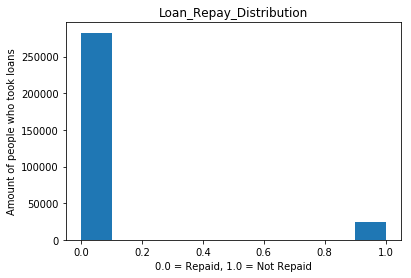

In [7]:
ax1 = train['TARGET'].astype(int).plot.hist()
ax1.set_xlabel('0.0 = Repaid, 1.0 = Not Repaid')
ax1.set_ylabel('Amount of people who took loans')
ax1.set_title("Loan_Repay_Distribution")
ax1
#The data is imbalanced. There is much more data where the loan was repaid than not.

In [8]:
train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [9]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [10]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#How many unique c in classes in columns of object type?
#We will have to label encode these, or one hot encode later on

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [30]:
correlations = train.corr()['TARGET'].sort_values()
correlations
# Display correlations just to see if there are any obvious variables correlated with TARGET. Age of loan candidate seems to be one.

EXT_SOURCE_3                                        -0.178919
EXT_SOURCE_2                                        -0.160472
EXT_SOURCE_1                                        -0.155317
NAME_EDUCATION_TYPE_Higher education                -0.056593
CODE_GENDER_F                                       -0.054704
NAME_INCOME_TYPE_Pensioner                          -0.046209
ORGANIZATION_TYPE_XNA                               -0.045987
DAYS_EMPLOYED                                       -0.044932
FLOORSMAX_AVG                                       -0.044003
FLOORSMAX_MEDI                                      -0.043768
FLOORSMAX_MODE                                      -0.043226
EMERGENCYSTATE_MODE_No                              -0.042201
HOUSETYPE_MODE_block of flats                       -0.040594
AMT_GOODS_PRICE                                     -0.039645
REGION_POPULATION_RELATIVE                          -0.037227
ELEVATORS_AVG                                       -0.034199
ELEVATOR

In [8]:
pd.crosstab(train.TARGET, train.CODE_GENDER, dropna=False)

#We can see that women take more loans and higher percentage of them repays the loans. 
#And there are 4 people with unindentified gender, who repayed their loans :)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


In [9]:
print('There are {0} people with realty. {1}% of them repay loans.'.format(train[train.FLAG_OWN_REALTY == 'Y'].shape[0], np.round(train[train.FLAG_OWN_REALTY == 'Y'].TARGET.value_counts(normalize=True).values[1], 3) * 100))
print('There are {0} people with cars. {1}% of them repay loans.'.format(train[train.FLAG_OWN_CAR == 'Y'].shape[0], np.round(train[train.FLAG_OWN_CAR == 'Y'].TARGET.value_counts(normalize=True).values[1], 4) * 100))
print('Average age of the car is {:.2f} years.'.format(train.groupby(['FLAG_OWN_CAR'])['OWN_CAR_AGE'].mean().values[1]))

There are 213312 people with realty. 8.0% of them repay loans.
There are 104587 people with cars. 7.24% of them repay loans.
Average age of the car is 12.06 years.


In [10]:
pd.crosstab(train.CNT_CHILDREN, train.NAME_FAMILY_STATUS, dropna=False)
#We can see that most of the people are married and have zero children. 
#In fact we can divide people into two group based on their family status - living together with their partner or single.

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
CNT_CHILDREN,,,,,,
0,20947,126575,14132,38810,2,14905
1,6588,43696,4389,5578,0,868
2,1936,22496,1111,958,0,248
3,262,3190,122,85,0,58
4,33,370,12,9,0,5
5,5,74,2,1,0,2
6,2,17,1,0,0,1
7,1,5,0,0,0,1
8,0,2,0,0,0,0


In [11]:
pd.crosstab(train.CNT_CHILDREN, train.CNT_FAM_MEMBERS, dropna=False)
#It isn't surprising that there are a lot of families consisting of two or one adults

CNT_FAM_MEMBERS,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,20.0
CNT_CHILDREN,,,,,,,,,,,,,,,,,
0,67847,147522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,10835,50284,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2317,24432,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,265,3452,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,26,403,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,5,79,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,19,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [13]:
train['NAME_TYPE_SUITE'].value_counts(dropna=False)


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [12]:
pd.crosstab(train.NAME_TYPE_SUITE, train.NAME_FAMILY_STATUS, dropna=False)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_TYPE_SUITE,,,,,,
Children,253,1940,318,378,0,378
Family,3702,28617,1747,4150,0,1933
Group of people,29,165,20,44,0,13
Other_A,147,340,70,268,0,41
Other_B,171,854,132,486,0,127
"Spouse, partner",1247,9685,74,345,0,19
Unaccompanied,24112,154047,17334,39529,0,13504


In [ ]:
#It is interesting to see that these two variables sometimes contradict each other. For example, separated, single or widowed applicants were sometimes accompanied by their partner. 
#I suppose this means unofficial relationships? Also sometimes children accompanied the applicant. Maybe these were adult childred?

In [28]:
train.groupby(['NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count']})

AMT_INCOME_TOTAL                  
                                 mean    median   count
NAME_INCOME_TYPE                                       
Businessman             652500.000000  495000.0      10
Commercial associate    202955.327289  180000.0   71617
Maternity leave         140400.000000   90000.0       5
Pensioner               136401.292273  117000.0   55362
State servant           179737.969506  157500.0   21703
Student                 170500.000000  157500.0      18
Unemployed              110536.363636   78750.0      22
Working                 163169.889223  135000.0  158774

In [16]:
train[train['NAME_INCOME_TYPE'] == 'Maternity leave']['CODE_GENDER'].value_counts()

F    4
M    1
Name: CODE_GENDER, dtype: int64

In [ ]:
#We can see that there are 4 categories with little amount of people in them: several high-income businessmen, 4 women and 1 man on maternity leave, and some unemployed/students. 
#Interesting to see that unemployed/students have quite a high income. 
#And of course, most of the people work.

In [29]:
s = pd.crosstab(train.NAME_INCOME_TYPE, train.OCCUPATION_TYPE, dropna=False).style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_INCOME_TYPE,,,,,,,,,,,,,,,,,,
Businessman,0,0,0,1,0,0,0,0,0,0,7,0,0,0,0,0,0,0
Commercial associate,3970,892,1305,6528,4916,220,3495,204,12763,370,8916,1036,989,324,11104,343,1559,386
Maternity leave,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Pensioner,0,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
State servant,729,261,453,6956,815,64,1033,55,1868,25,2142,2585,38,9,186,264,380,53
Student,1,0,0,3,1,0,0,0,5,2,0,0,0,0,0,0,0,1
Working,5112,3498,4188,14080,12871,279,6852,267,40548,1696,10306,4915,1625,418,20811,698,4782,908


In [18]:
#AMT_GOODS_PRICE = For consumer loans it is the price of the goods for which the loan is given
print('{0} zero values.'.format(train[train['AMT_GOODS_PRICE'].isnull()].shape[0]))

278 zero values.


In [ ]:
#So this means that only 278 loans have some other type. Let's go deeper.

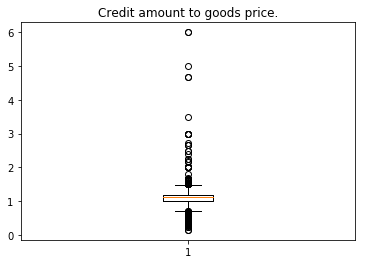

In [30]:
non_zero_good_price = train[train['AMT_GOODS_PRICE'].isnull() == False]
credit_to_good_price = non_zero_good_price['AMT_CREDIT'] / non_zero_good_price['AMT_GOODS_PRICE']
plt.boxplot(credit_to_good_price);
plt.title('Credit amount to goods price.');

In [ ]:
#Figure out why this code does not work
#Contact information = There are 6 features showing that client provided some contact information, let's see how many ways of contact clients usually provide.
#train['contact_info'] = train['FLAG_MOBIL'] + train['FLAG_EMP_PHONE'] + ['FLAG_WORK_PHONE'] + ['FLAG_CONT_MOBILE'] + train['FLAG_PHONE'] + train['FLAG_EMAIL']
#sns.countplot(train['contact_info']);
#plt.title('Count of ways to contact client')

Text(0.5,1,'Counts of housing type')

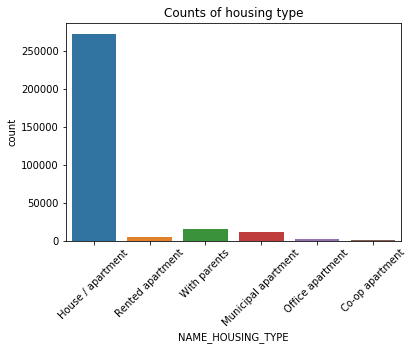

In [20]:
sns.countplot(train['NAME_HOUSING_TYPE']);
plt.xticks(rotation=45);
plt.title('Counts of housing type')

In [ ]:
#CONTINUTE WITH DATA EXP LATER...I WANT TO SEE WHAT IT WILL BE LIKE MANIPULATING THE DATA

In [12]:
def missingvals(x):
    return sum(x.isnull())
print ("Missing values per column")
print (train.apply(missingvals))
print (train.apply(missingvals, axis = 1).head())
#Looks like there are too many columns to get a good picture of what is missing this way so let's make another function

Missing values per column
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE  

In [21]:
def missingvals(x):  
    # Total missing values
        missing_vals = train.isnull().sum()
        
        # Percentage of missing values
        missing_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        missing_val_table = pd.concat([missing_vals, missing_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_rename = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Missing % of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_rename = mis_val_table_rename[
            mis_val_table_rename.iloc[:,1] != 0].sort_values(
        'Missing % of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The training set has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_rename.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_rename

In [15]:
missingvals(train)
#That's a good a amount of missing values. Some might be important for the model so we have
#to impute them later

The training set has 122 columns.
There are 67 columns that have missing values.


,Missing Values,Missing % of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [16]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#Let's encode these now to make analysis and cleaning easier later

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0 #To keep track how how many columns we encode

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [19]:
#The train dataset and test dataset should have same number of columns
#But we added more columns to training because of the encoding...also the target variable is in training
train_labels = train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [20]:
pd.crosstab(train.TARGET, train.NAME_CONTRACT_TYPE, dropna=False, normalize='all')

#We can see that there are two types of contract - cash loans and revolving loans. Most of the loans are cash loans which are defaulted

NAME_CONTRACT_TYPE,0,1
TARGET,,
0,0.829274,0.089997
1,0.075513,0.005216


In [32]:
#Now go through anomalies
(train['DAYS_BIRTH'] / -365).describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
#Age distribution seems...reasonable

In [34]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
#Days employed seems...unreasonable!!! Someone has been employed for almost 1000 years...must be a hard worker

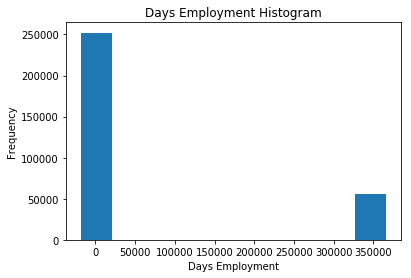

In [35]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
#To be continued...